# Calculating grid cell albedo in the MetUM

Equations and worked examples to calculate grid cell albedo as it is calculated in the MetUM.

#### Sources

- (Dia2024) Diamond, R., Schroeder, D., Sime, L. C., Ridley, J., & Feltham, D. (2024). The Significance of the Melt-Pond Scheme in a CMIP6 Global Climate Model. https://doi.org/10.1175/JCLI-D-22 

- (Hun2015) Hunke, E. C., Lipscomb, W. H., Turner, A. K., Jeffery, N., & Elliott, S. (2015). CICE: the Los Alamos Sea Ice Model Documentation and Software User’s Manual Version 5.1 LA-CC-06-012. http://oceans11.lanl.gov/trac/CICE/wiki.

- (Rae2014) Rae, J. G. L., Hewitt, H. T., Keen, A. B., Ridley, J. K., Edwards, J. M., & Harris, C. M. (2014). A sensitivity study of the sea ice simulation in the global coupled climate model, HadGEM3. Ocean Modelling, 74, 60–76. https://doi.org/10.1016/j.ocemod.2013.12.003 

- (Rid2018) Ridley, J. K., Blockley, E. W., Keen, A. B., Rae, J. G. L., West, A. E., & Schroeder, D. (2018). The sea ice model component of HadGEM3-GC3.1. Geoscientific Model Development, 11(2), 713–723. https://doi.org/10.5194/gmd-11-713-2018 

#### Key questions
1. Is this the same in GC4? If not, what is different?
2. 

#### Info from Rid2018

The albedo scheme used in GSI8.1 is based on the scheme
used in the CCSM3 model (see Hunke et al., 2015) and has
separate albedos for visible (< 700 nm) and near-infrared
(> 700 nm) wavelengths for both bare ice and snow. The
scheme is described in Sect. 3.6.2 of the CICE User’s Manual
(Hunke et al., 2015). The penetration of radiation into the ice,
as described by Hunke et al. (2015), is not included here. For
this reason, following Semtner (1976), a correction is applied
to the surface albedo to account for scattering within the ice
pack.

The melt pond area fraction, fp(n), and depth,
hp(n), for ice in thickness category n (ITC), are calculated with
the CICE topographic melt pond formulation (Flocco et al.,
2010, 2012; Hunke et al., 2015). Where the pond depth,
hp(n), on ice of thickness category n is shallower than 4 mm,
the ponds are assumed to have no impact on albedo, and the
albedo, αpi(n), of such ponded ice is simply equal to that of
bare ice, αi. Where the pond depth is greater than 20 cm, the
underlying bare ice is assumed to have no impact, and the
ponded ice albedo is assumed equal to that of the melt pond,
αp. For ponds deeper than 4 mm but shallower than 20 cm,
the underlying bare ice is assumed to have an impact on the
total pond albedo, and the bare ice and melt pond albedos are
combined linearly (Briegleb and Light, 2007), see equation 1.

#### Info from Dia2024

Page 251:
For the default explicit topographic pond scheme used in
the sea ice component of HadGEM3, which we hereinafter
denote pond scheme E, the albedo calculation is based on the
scheme used in the CCSM3 model (Hunke et al. 2015) but in-
cludes surface melt ponds by applying the explicit topographic
melt-pond model of Flocco et al. (2012, 2010). Pond evolution
is modeled by including snowmelt contributing to spring/
summer pond formation; reduced albedo of pond-covered ice;
vertical drainage of ponds through ice; and ponds refreezing
in autumn. In reality, pond formation occurs when meltwater,
formed as a result of snowmelt, ice melt, and precipitation,
runs downhill under the inﬂuence of gravity to collect on sea
ice (Flocco et al. 2010). In CICE, within each grid cell, there
are ﬁve ice thickness categories but ice topography is not
modeled explicitly (see section 2a). Therefore, to account for
pond formation, for a given grid cell, for each time step, the
surface height of each thickness category is calculated. Within
a grid cell, applying the continuum hypothesis yields the con-
clusion that meltwater in this grid cell will be transported to
ice of the lowest surface height within one time step. There-
fore, all meltwater present in the cell (after accounting for
melting, freezing, advection, precipitation, drainage, and run-
off) is distributed between the thickness categories in order of
increasing surface height (Flocco et al. 2010; Flocco and
Feltham 2007; Flocco et al. 2012).

Provided the calculated
pond height is above sea level, a prescribed fraction of this
“ponded” meltwater runs into the ocean (to account for run-
off around the edges of ﬂoes or through cracks); the sea ice
permeability controls what proportion of the remaining melt-
water drains vertically through the ice. Pond refreezing near
the end of melt season is accounted for by modeling the for-
mation of ice lids on the pond, that grow, partially melt, or
melt completely, depending on the surface ﬂux. Thus, by
modeling pond formation, runoff, drainage, and refreezing for
each grid cell, at each time step, the evolution of pond frac-
tion of the sea ice, and pond depth on the sea ice, can be
calculated, and used in a separate routine to calculate the
area-averaged sea ice albedo (Flocco et al. 2010; Flocco and
Feltham 2007; Flocco et al. 2012).

#### On grid cell fraction vs sea ice fraction

Dia2024, Page 252:
Note that here, to make the calculation of sea ice albedo clearer, f
denotes “fraction of the sea ice” (e.g., for a given grid cell fp is
fraction of the sea ice area covered by ponds). In the remainder of the paper, we use this same quantity in almost all cases.
For the cases in which we use area fraction of the grid cell
(e.g., fraction of the grid-cell area covered by ponds), we note
this redundantly.

Similarly in Rid2018, Page 714:
The scheme calculates the total grid-box albedo, α(n), of
ice in thickness category n for each of the two wavebands by combining the albedo, αpi(n), of the ponded fraction, calcu-
lated as described here, with the albedos of bare ice, αi, and
snow, αs(n), weighted by the melt pond fraction, fp(n), and
the snow fraction, fs(n).

So both state that fractions are of the sea ice area, just in (slightly confusingly) different ways.

#### Issue 1

Albedo of cold snow parameters are different in Rid2018 and Dia2024, is this intentional or a mistake?
- Rid2018
    - albsnowv_cice = 0.98
    - albsnowi_cice = 0.70
- Dia2024
    - albsnowv_cice = 0.96
    - albsnowi_cice = 0.68
    
Near the end of page 251 in Dia2024, the values are stated to be 
the same between the papers: "Relevant surface albedo parameters 
applied in the model are presented in Table 1, also in more detail
in Table A1 of Ridley et al. (2018b)."

So it seems this discrepancy is a mistake... Using the Rid2018 values below.

In [231]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

### Equations and namelist from Rid2018

In [60]:
# Note: (n) notation for thickness cats. is dropped.
# equations can be repeated for each thickness cat.,
# SW rad. band or direct/diffuse rad.

# Rid2018 Eq1
def Rideq1_alb_pi(h_p,alb_p,alb_i):
    '''
    Calculate the impact of surface melt ponds on albedo 
    as an addition to the CCSM3 albedo scheme. Explicit
    impact of melt ponds on albedo. 
    
    For ponds deeper than 4 mm but shallower than 20 cm.
    
    h_p: pond depth
    alb_p: pond albedo
    alb_i: bare ice albedo
    
    alb_pi = (h_p/0.2)*alb_p + (1-(h_p/0.2))*alb_i
    '''
    alb_pi = (h_p/0.2)*alb_p + (1-(h_p/0.2))*alb_i
    return alb_pi

# Rid2018 Eq2
def Rideq2_alb_s(alb_c,delta_alb_s_with_T,T,T_c):
    '''
    The reduction in snow albedo, αs(n), with increasing
    surface skin temperature, intended to take account of the
    lower albedo of melting snow, has been retained from 
    (Hunke et al., 2015).
    
    alb_c: albedo of cold snow
    delta_alb_s_with_T: change in snow visible/near-IR albedo per 
    ◦C rise in temperature, (αm − αc / Tm − Tc) in Eq. (2)
    T: surface skin temperature of ice in thickness category n
    T_c: threshold temperature, below Tm, at which surface melting 
    starts to affect the snow albedo
    
    Note: αm and Tm not specified, as they are instead replaced 
    by delta_alb_s_with_T
    
    if T < Tc:
        alb_s = alb_c
    elif T >= Tc:
        alb_s = alb_c + (delta_alb_s_with_T*(T-Tc))
    '''
    if T < T_c:
        alb_s = alb_c
    elif T >= T_c:
        alb_s = alb_c + (delta_alb_s_with_T*(T-T_c))
    return alb_s

# Rid2018 Eq3
def Rideq3_alb(f_p,alb_pi,f_s,alb_s,alb_i):
    '''
    The scheme calculates the total grid-box albedo, α(n), of
    ice in thickness category n for each of the two wavebands by
    combining the albedo, αpi(n), of the ponded fraction, calcu-
    lated as described here, with the albedos of bare ice, αi, and
    snow, αs(n), weighted by the melt pond fraction, fp(n), and
    the snow fraction, fs(n).
    
    f_p: ponded fraction
    alb_pi: albedo of ponds (eq1)
    f_s: snow fraction
    alb_s: snow_albedo (eq2)
    alb_i: bare ice albedo
    
    alb = (f_p*alb_pi) + ((1-f_p)*((f_s*alb_s)+((1-f_s)*(alb_i))))
    '''
    alb = (f_p*alb_pi) + ((1-f_p)*((f_s*alb_s)+((1-f_s)*(alb_i))))
    return alb

# Rid2018 Eq4
def Rideq4_f_s(h_s,hsnowpatch):
    '''
    The snow fraction, fs(n), representing surface inhomogeneity 
    due to windblown snow, for category n is empirically 
    parameterized via a calculation based on snow depth, hs(n),
    where hsnowpatch is a length scale parameter (Hunke
    et al., 2015).
    
    h_s: snow depth
    hsnowpatch: length scale parameter
    
    f_s = h_s/(h_s+hsnowpatch)
    '''
    f_s = h_s/(h_s+hsnowpatch)
    return f_s


### Rid2018 Table A1: 
### JULES namelist (constants)
# Number of sea ice thickness categories used in surface exchange, n as limit in Eqs. (1–4)
nice_use = 5
# Visible albedo of bare ice, αi in Eq. (1)
albicev_cice = 0.78
# Near-infrared albedo of bare ice, αi in Eq. (1)
albicei_cice = 0.36
# Visible albedo of cold snow, αc in Eq. (2)
albsnowv_cice = 0.98
# Near-infrared albedo of cold snow, αc in Eq. (2)
albsnowi_cice = 0.70
# Emissivity of sea ice
emis_sice = 0.9760
# Visible albedo of melt ponds, αp in Eq. (1)
albpondv_cice = 0.27
# Near-infrared albedo of melt ponds, αp in Eq. (1)
albpondi_cice = 0.07
# Change in snow visible albedo per ◦C rise in temperature
# (αm − αc / Tm − Tc) in Eq. (2)
dalb_mlts_v_cice = -0.10
# Change in snow near-infrared albedo per ◦C rise in temperature
# (αm − αc / Tm − Tc) in Eq. (2)
dalb_mlts_i_cice = -0.15
# Permitted range of snow temperature over which albedo changes (K), −Tc in Eq. (2)
dt_snow_cice = 1.00
T_c = -dt_snow_cice
# Sea ice thickness (m) below which albedo is inﬂuenced by underlying ocean
ahmax = 0.3
# Semtner correction: fraction of SW radiation that penetrates sea ice and scatters back
pen_rad_frac_cice = 0.4
# Semtner correction: attenuation parameter for SW in sea ice which controls the additional albedo due to internal scattering
sw_beta_cice= 0.6
# Length scale for parameterization of non-uniform snow coverage (m).
# hsnowpatch in Eq. (4)
hsnowpatch = 0.02
# Roughness length for the MIZ (marginal ice zone) (m)
z0miz = 0.1
# Roughness length for pack ice (m)
z0sice = 0.0005
# Ratio of thermal to momentum roughness lengths for marginal ice
z0h_z0m_miz = 0.2
# Ratio of thermal to momentum roughness lengths for pack ice
z0h_z0m_sice = 0.2

### From CICE namelists: ponds_nml
# Critical pond lid thickness (m)
hp1 = 0.01
# Maximum retained fraction of meltwater
rfracmax = 0.85
# Minimum retained fraction of meltwater
rfracmin = 0.15

### Equations from Dia2024

In [57]:
# explicit scheme, E

def Diaeq2_alb(f_s,alb_s,f_i,alb_i,f_p,alb_p):
    '''
    For ponds with depths from 4 mm to 20 cm, the albedo 
    is calculated by linearly combining the bare ice and 
    melt pond albedos (as the underlying bare ice is assumed 
    to impact the total pond albedo; see Ridley et al. (2018b) 
    for further details).
    
    Note: the bare ice fraction, f_i, is the residual fraction
    of the sea ice after f_s and f_p (Page 252, Dia2024).
    
    f_s: snow fraction
    alb_s: snow_albedo (Rideq2)
    f_i: bare ice fraction
    alb_i: bare ice albedo
    f_p: ponded fraction
    alb_p: albedo of ponds
    
    alb = (f_s*alb_s) + (f_i*alb_i) + (f_p*alb_p)
    '''
    alb = (f_s*alb_s) + (f_i*alb_i) + (f_p*alb_p)
    return alb

### Worked examples

#### Example 1
assumptions:

- grid box sea ice fraction, SIF = 1
- pond depth, h_p > 0.2 m, hence ponded ice albedo equal to that of the melt pond, albpond, no need for eq1
- pond fraction, f_p = 0.25
- snow depth, h_s = 0.02 m, hence f_s = 0.5 following Rid2018 eq2
- for ITC 1, n = 1
- skin temperature = -1

In [56]:
# for visible SW rad band only
alb_pi = albpondv_cice
alb_i = albicev_cice
# for assumed pond fraction of 0.25
f_p = 0.25
# snow fraction
h_s = 0.02
f_s = Rideq4_f_s(h_s,hsnowpatch)
# skin temperature
T = -1.0
# snow albedo
alb_s = Rideq2_alb_s(alb_c=albsnowv_cice,
                  delta_alb_s_with_T=dalb_mlts_v_cice,
                  T=T,T_c=T_c)
# (alb_s = albsnowv_cice)

# grid box albedo
alb_cell = Rideq3_alb(f_p, alb_pi, f_s, alb_s, alb_i)
print('grid box sea ice albedo:',"{:.3f}".format(alb_cell))

grid box sea ice albedo: 0.728


#### Example 2
same assumptions as Ex1 but using Dia2024 eq2 instead of Rid2018 eq3

In [58]:
# for visible SW rad band only
alb_p = albpondv_cice
alb_i = albicev_cice
# for assumed pond fraction of 0.25
f_p = 0.25
# snow fraction
h_s = 0.02
f_s = Rideq4_f_s(h_s,hsnowpatch)
# bare ice fraction as residual of f_s and f_p
f_i = 1 - f_s - f_p
# skin temperature
T = -1.0
# snow albedo
alb_s = Rideq2_alb_s(alb_c=albsnowv_cice,
                  delta_alb_s_with_T=dalb_mlts_v_cice,
                  T=T,T_c=T_c)
# (alb_s = albsnowv_cice)

# grid box albedo
alb_cell = Diaeq2_alb(f_s, alb_s, f_i, alb_i, f_p, alb_p)
print('grid box sea ice albedo:',"{:.3f}".format(alb_cell))

grid box sea ice albedo: 0.753


#### Issue 2

The two formulations of the sea ice albedo calculations, under the exact same assumptions, give different albedo values (Rid2018 = 0.728, Dia2024 = 0.753).

As far as I can tell, they are supposed to produce the same result.

#### Thought 1

The assumption that the bare ice fraction is a residual of the snow fraction and pond fraction could be a key issue. How good is the snow distribution parameterization and how has the snowpatch length scale been set? And, of course, how accurate is the pond fraction? The latter is something we are working on doing an evaluation of. We are yet to think of a good approach to evaluating model snow.

#### Example 3
comparison of the two formulations, given snow fraction = 0

assumptions:

- grid box sea ice fraction, SIF = 1
- pond depth, h_p > 0.2 m, hence ponded ice albedo equal to that of the melt pond, albpond, no need for eq1
- pond fraction, f_p = 0.25
- snow depth, h_s = 0.0 m, hence f_s = 0.0 following Rid2018 eq2
- for ITC 1, n = 1
- skin temperature = -1

In [233]:
# for visible SW rad band only
alb_p = albpondv_cice
alb_i = albicev_cice
# for assumed pond fraction of 0.25
f_p = 0.25
# snow fraction
h_s = 0.0
f_s = Rideq4_f_s(h_s,hsnowpatch)
# bare ice fraction as residual of f_s and f_p
f_i = 1 - f_s - f_p
# skin temperature
T = -1.0

# Rid2018 grid box albedo
rid_alb_si_cell = Rideq3_alb(f_p, alb_pi, f_s, alb_s, alb_i)
print('Ridley grid box sea ice albedo:',"{:.3f}".format(rid_alb_si_cell))

# Dia2024 grid box albedo
dia_alb_si_cell = Diaeq2_alb(f_s, alb_s, f_i, alb_i, f_p, alb_p)
print('Diamond grid box sea ice albedo:',"{:.3f}".format(dia_alb_si_cell))

Ridley grid box sea ice albedo: 0.652
Diamond grid box sea ice albedo: 0.652


#### Issue 3
With no snow fraction the sea ice albedos are the same.

The different formulation of the equations in Rid2018 and Dia2024 appear to give different effective fractions of snow and bare ice.

e.g., in Rid2018 eq3 for Example 1:
- f_p = 0.25, 
- f_s = 0.5, but f_s is then multiplied by (1-f_p), hence effectively the fraction becomes 0.375.
- f_i is not explicitly stated, but it is implied as (1-f_p) * (1-f_s), hence 0.75 * 0.5 = 0.375

in Dia2024 eq2 for Example 2:
- f_p = 0.25,
- f_s = 0.5
- f_i = 1 - f_p - f_s = 0.25

These differences in the multiplication factors for the snow and bare ice albedos give different overall grid cell sea ice albedos.

#### Include albedo of open water for SIF < 1, to find grid box mean albedo
assume ocean alb_o = 0.06 (setting for diffuse SW rad. in MetUM)

Note: this remains a simplification of the albedo scheme.
The open water albedo depends on several factors, it
is not a constant. In the MetUM three schemes are available.
Direct SW albedo depends on solar zenith angle 
in the Briegleb et al. (1986) and modified Barker and 
Li (1995) schemes. In these two schemes the diffuse SW 
albedo is fixed at 0.06 and spectrally dependent scaling can 
be used. A third more complex scheme is available from
Jin et al. (2011), which includes the solar zenith angle,
wind speed and ocean near-surface chlorophyll. This scheme
allows for either broadband or spectral albedos to be used.

Further, I have thus far omitted any impact of frozen melt
pond lids. And in the model albedo is calculated on tiles within a grid
cell, allowing tiles to be either sea ice, open water or land, which I am 
yet to include in any equation - assume no coast line.

In [235]:
def weight_alb_si_by_sif(sif,alb_o,alb_si_cell):
    '''
    Find total grid cell albedo by taking into account
    the fraction and albedo of open water and the fraction 
    and albedo of sea ice as calculated in either the 
    Rid2018 or Dia2024 equations. 
    
    alb_tot_cell = ((1-sif)*alb_o)+(sif*alb_si_cell)
    '''
    alb_tot_cell = ((1-sif)*alb_o)+(sif*alb_si_cell)
    return alb_tot_cell

#### Example 4
comparison of the two formulations, given snow fraction = 0.5
and sif = 0.8

assumptions:
- grid box sea ice fraction, SIF = 0.8
- pond depth, h_p > 0.2 m, hence ponded ice albedo equal to that of the melt pond, albpond, no need for eq1
- snow depth, h_s = 0.02 m, hence f_s = 0.5
- for ITC 1, n = 1
- skin temperature = -1

In [64]:
# sif
sif = 0.8
# albedo of open water
alb_o = 0.06
# for visible SW rad band only
alb_p = albpondv_cice
alb_i = albicev_cice
# for assumed pond fraction of 0.25
f_p = 0.25
# snow fraction
h_s = 0.02
f_s = Rideq4_f_s(h_s,hsnowpatch)
# bare ice fraction as residual of f_s and f_p
f_i = 1 - f_s - f_p
# skin temperature
T = -1.0

# Rid2018 grid box albedo
rid_alb_si_cell = Rideq3_alb(f_p, alb_pi, f_s, alb_s, alb_i)
print('Ridley grid box sea ice albedo:',"{:.3f}".format(rid_alb_si_cell))
rid_alb_tot_cell = weight_alb_si_by_sif(sif,alb_o,rid_alb_si_cell)
print('Ridley grid box total albedo:',"{:.3f}".format(rid_alb_tot_cell))

# Dia2024 grid box albedo
dia_alb_si_cell = Diaeq2_alb(f_s, alb_s, f_i, alb_i, f_p, alb_p)
print('Diamond grid box sea ice albedo:',"{:.3f}".format(dia_alb_si_cell))
dia_alb_tot_cell = weight_alb_si_by_sif(sif,alb_o,dia_alb_si_cell)
print('Diamond grid box total albedo:',"{:.3f}".format(dia_alb_tot_cell))

Ridley grid box sea ice albedo: 0.728
Ridley grid box total albedo: 0.594
Diamond grid box sea ice albedo: 0.753
Diamond grid box total albedo: 0.614


#### Issue 4

The different schemes have a non-neglible impact on grid box mean albedo

#### Example 5
calculate arrays of albedo for ranges of snow fraction and sea
ice albedo to assess the sensitivity of grid cell albedo to 
the differing equations

In [236]:
# range of pond fractions, 0 to 0.8 in steps of 0.2
f_p_range = np.arange(0,1.0,0.2)
# range of sea ice fractions, 0 to 1 in steps of 0.2
sif_range = np.arange(0,1.2,0.2)

data = []
for sif_val in sif_range:
    sif = sif_val
    print('SIF:',sif)
    for f_p_val in f_p_range:
        f_p = float("{:.1f}".format(f_p_val))
        print('\nPond fraction:',"{:.1f}".format(f_p),'\n')
        # range of snow fractions, 0 to 1 in steps of 0.2
        # only allow non-ponded fraction
        f_s_max = 1 - f_p_val
        step = 0.2
        f_s_range = np.arange(0,f_s_max+step,step)

        for f_s_val in f_s_range:
            f_s = float("{:.1f}".format(f_s_val))
            print('Snow fraction:',"{:.1f}".format(f_s))
            f_i = 1 - f_s - f_p
            print('Bare ice fraction:',"{:.1f}".format(f_i))
            # Rid2018 grid box albedo
            rid_alb_si_cell = Rideq3_alb(f_p, alb_pi, f_s, alb_s, alb_i)
            print('Ridley grid box sea ice albedo:',"{:.3f}".format(rid_alb_si_cell))
            rid_alb_tot_cell = weight_alb_si_by_sif(sif,alb_o,rid_alb_si_cell)
            print('Ridley grid box total albedo:',"{:.3f}".format(rid_alb_tot_cell))
            # Dia2024 grid box albedo
            dia_alb_si_cell = Diaeq2_alb(f_s, alb_s, f_i, alb_i, f_p, alb_p)
            print('Diamond grid box sea ice albedo:',"{:.3f}".format(dia_alb_si_cell))
            dia_alb_tot_cell = weight_alb_si_by_sif(sif,alb_o,dia_alb_si_cell)
            print('Diamond grid box total albedo:',"{:.3f}".format(dia_alb_tot_cell))

            data.append({
                'sif':sif,
                'f_p':f_p,
                'f_s':f_s,
                'f_i':f_i,
                'rid_alb_si':rid_alb_si_cell,
                'rid_alb_tot':rid_alb_tot_cell,
                'dia_alb_si':dia_alb_si_cell,
                'dia_alb_tot':dia_alb_tot_cell
            })
        
df = pd.DataFrame(data)
ds = df.to_xarray()

SIF: 0.0

Pond fraction: 0.0 

Snow fraction: 0.0
Bare ice fraction: 1.0
Ridley grid box sea ice albedo: 0.780
Ridley grid box total albedo: 0.060
Diamond grid box sea ice albedo: 0.780
Diamond grid box total albedo: 0.060
Snow fraction: 0.2
Bare ice fraction: 0.8
Ridley grid box sea ice albedo: 0.820
Ridley grid box total albedo: 0.060
Diamond grid box sea ice albedo: 0.820
Diamond grid box total albedo: 0.060
Snow fraction: 0.4
Bare ice fraction: 0.6
Ridley grid box sea ice albedo: 0.860
Ridley grid box total albedo: 0.060
Diamond grid box sea ice albedo: 0.860
Diamond grid box total albedo: 0.060
Snow fraction: 0.6
Bare ice fraction: 0.4
Ridley grid box sea ice albedo: 0.900
Ridley grid box total albedo: 0.060
Diamond grid box sea ice albedo: 0.900
Diamond grid box total albedo: 0.060
Snow fraction: 0.8
Bare ice fraction: 0.2
Ridley grid box sea ice albedo: 0.940
Ridley grid box total albedo: 0.060
Diamond grid box sea ice albedo: 0.940
Diamond grid box total albedo: 0.060
Snow frac

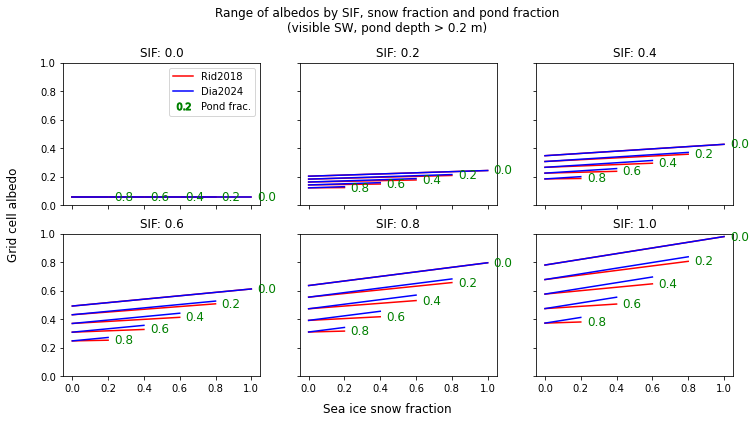

In [241]:
# plot results
fig = plt.figure(figsize=(12,6))
fig.suptitle('Range of albedos by SIF, snow fraction and pond fraction\n(visible SW, pond depth > 0.2 m)')
plt.subplots_adjust(top=0.85)
rows = 2
cols = 3
fig.text(0.06, 0.5, 'Grid cell albedo', va='center', rotation='vertical',fontsize=12)
fig.text(0.5, 0.04, 'Sea ice snow fraction', ha='center',fontsize=12)

for i,sif in enumerate(sif_range):
    ax = plt.subplot(rows,cols,i+1)
    ax.set_ylim(0,1)
    
    if i in [0,1,2]:
        ax.xaxis.set_tick_params(labelbottom=False)
    if i in [1,2,4,5]:
        ax.yaxis.set_tick_params(labelbottom=False)
    ax.set_title('SIF: '+str("{:.1f}".format(sif)),fontsize=12)
    
    if i == 0:
        custom_lines = [Line2D([0],[0],color='red'),
                        Line2D([0],[0],color='blue'),
                        Line2D([0],[0],marker='$0.2$',color='green',
                              markersize=14,lw=0)]
        ax.legend(custom_lines,['Rid2018','Dia2024','Pond frac.'])
    
    for i,f_p in enumerate(np.unique(ds.f_p)):
        d = ds.where(ds.sif==sif,drop=True)
        d = d.where(d.f_p==f_p,drop=True)

        # plot ridley solutions
        ax.plot(d.f_s,d.rid_alb_tot,
                color='red',label=str(f_p))
        if len(d.f_s>0):
            x = d.f_s[-1].data
            y = d.rid_alb_tot[-1].data
            label = d.f_p[0].data
            ax.annotate(label,xy=(x,y),xytext=(6,0),
                        color='green',
                        xycoords='data', textcoords="offset points",
                        size=12, va="center", ha="left")
            
        # plot diamond solutions
        ax.plot(d.f_s,d.dia_alb_tot,
                color='blue',label=str(f_p))

#### Figure 1
Demonstrates the sensitivity to the different formaluations of sea ice albedo in Rid2018 and Dia2024. The Dia2024 versio produces increasingly higher grid box albedos at higher snow fraction. The difference is increased at higher sea ice fraction and a pond fractions closer to 0.5.